In [1]:
"""
Created on Sun Apr 19 17:52:01 2020

@author: YanivM

subject:  ANN - binary_DataFrame

"""




# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# binary data
binary_data_path=r'C:\Users\97250\Desktop\studied\R ,python\ניתוח מידע\15-Decision-Trees-and-Random-Forests\loan_data.csv'

data = pd.read_csv(binary_data_path)

In [ ]:
#prepaing data
#The foloowing steps are:

   # 1. devide data to X and Y
   # 2. scaling
   # 3. converting to values (necessary to ANN algo.)
   # 4. train/test splitting

In [2]:
#sum of NA's per each column
data.isnull().sum()
#no NA's

# a little search of data
data.head()
data.iloc[0]
data.columns
data.select_dtypes(['object']).columns

#only one column is categorial and i'll switch it to dummy_variable
dummy_variable = pd.get_dummies(data['purpose'],drop_first=True)
data = pd.concat([data.drop('purpose',axis=1),dummy_variable],axis=1)

In [3]:
X = data.drop('not.fully.paid',axis=1)
y = data['not.fully.paid']

from sklearn.preprocessing import MinMaxScaler

cols = X.columns
X = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X,columns = cols)

X = X.values
y = y.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
# The following steps are:

   # 1. import TensorFlow
   # 2. create model
   # 3. fit
   # 4.visual evaluation
   # 5. numeric evaluation


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
model = Sequential()
model.add(Dense(14,activation = 'relu'))
model.add(Dense(7,activation = 'relu'))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy')

early = EarlyStopping(monitor='val_loss',mode='min',verbose =1,patience=25)
model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test),verbose=1,callbacks =[early])

Train on 6704 samples, validate on 2874 samples
Epoch 1/100
6704/6704 [==============================] - 1s 105us/sample - loss: 0.4693 - val_loss: 0.4215
Epoch 2/100
6704/6704 [==============================] - 0s 45us/sample - loss: 0.4288 - val_loss: 0.4130
Epoch 3/100
6704/6704 [==============================] - 0s 49us/sample - loss: 0.4221 - val_loss: 0.4115
Epoch 4/100
6704/6704 [==============================] - 0s 55us/sample - loss: 0.4194 - val_loss: 0.4094
Epoch 5/100
6704/6704 [==============================] - 0s 44us/sample - loss: 0.4187 - val_loss: 0.4091
Epoch 6/100
6704/6704 [==============================] - 0s 38us/sample - loss: 0.4177 - val_loss: 0.4101
Epoch 7/100
6704/6704 [==============================] - 0s 51us/sample - loss: 0.4172 - val_loss: 0.4081
Epoch 8/100
6704/6704 [==============================] - 0s 57us/sample - loss: 0.4169 - val_loss: 0.4077
Epoch 9/100
6704/6704 [==============================] - 0s 44us/sample - loss: 0.4159 - val_loss: 0.40

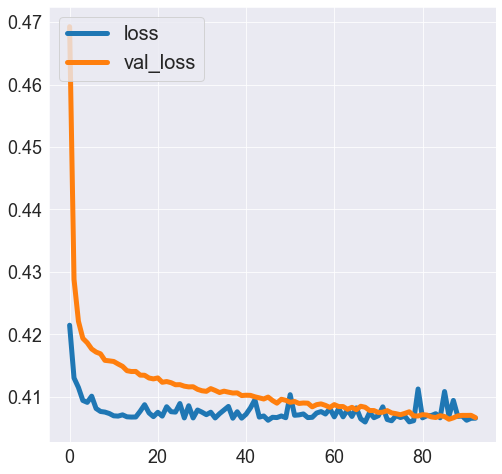

In [9]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
error = pd.DataFrame(loss,val_loss).reset_index()
error.columns = ['loss','val_loss']

error.plot(figsize=(8,8),lw=5,fontsize=18)
plt.legend(loc='upper left',prop={'size':20})

In [16]:
pred   = model.predict(X_test)
y_test = y_test.reshape(2874,1)

# convert pred proability to predicted class   Threshold = 0.5 
pred = [0 if i<0.2 else 1 for i in pred]

from sklearn.metrics import classification_report,confusion_matrix
print('\n\n classification_report: \n\n',classification_report(y_test,pred))
print('\n confusion_matrix is:\n\n',confusion_matrix(y_test,pred))

print('\n\n The recall is 0 - not good at all!! \n\n')



 classification_report: 

               precision    recall  f1-score   support

           0       0.88      0.79      0.83      2431
           1       0.27      0.42      0.33       443

    accuracy                           0.73      2874
   macro avg       0.57      0.60      0.58      2874
weighted avg       0.79      0.73      0.76      2874


 confusion_matrix is:

 [[1920  511]
 [ 257  186]]


 The recall is 0 - not good at all!! 






 classification_report for the threshold 0.2: 

               precision    recall  f1-score   support

           0       0.88      0.79      0.83      2431
           1       0.27      0.42      0.33       443

    accuracy                           0.73      2874
   macro avg       0.57      0.60      0.58      2874
weighted avg       0.79      0.73      0.76      2874

confusion_matrix for the threshold 0.2 is:

 [[1920  511]
 [ 257  186]]


 classification_report for the threshold 0.3: 

               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2431
           1       0.36      0.22      0.27       443

    accuracy                           0.82      2874
   macro avg       0.61      0.57      0.58      2874
weighted avg       0.79      0.82      0.80      2874

confusion_matrix for the threshold 0.3 is:

 [[2261  170]
 [ 347   96]]


 classification_report for the threshold 0.4: 

               precision    recall  f1-score   sup

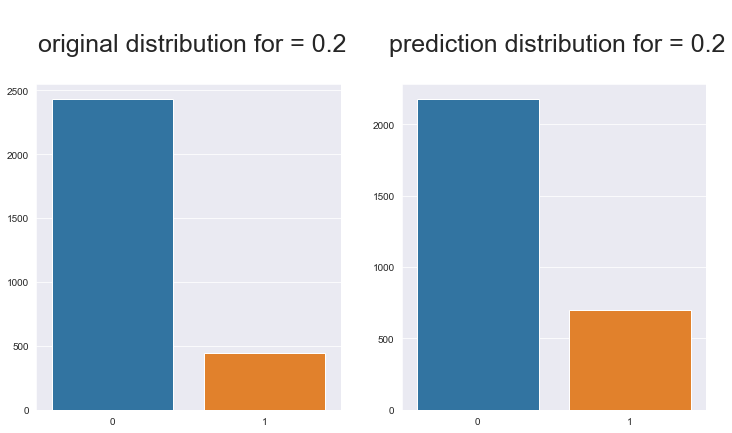

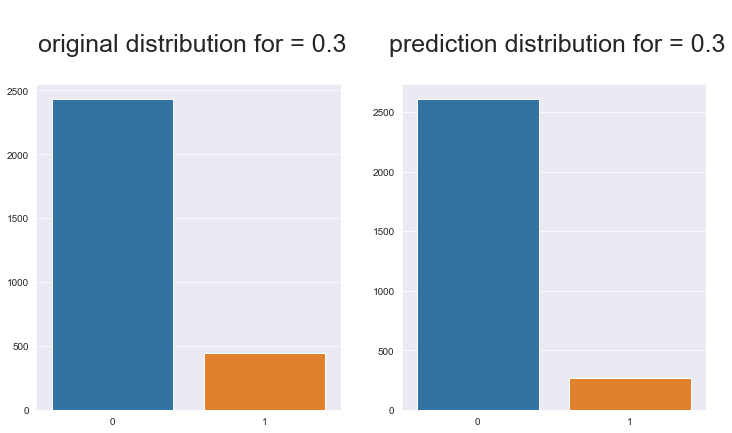

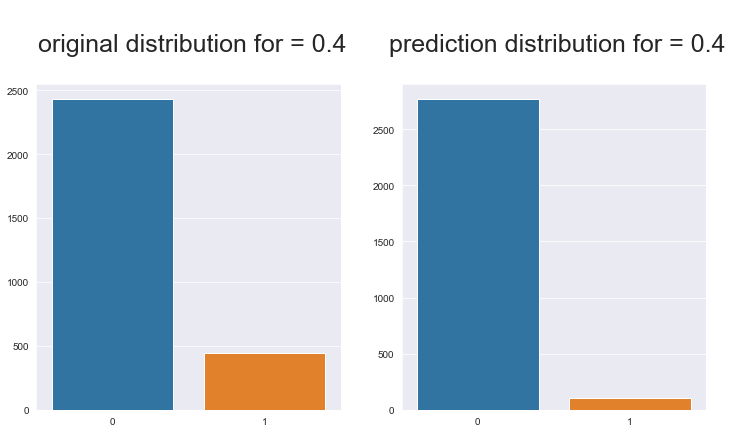

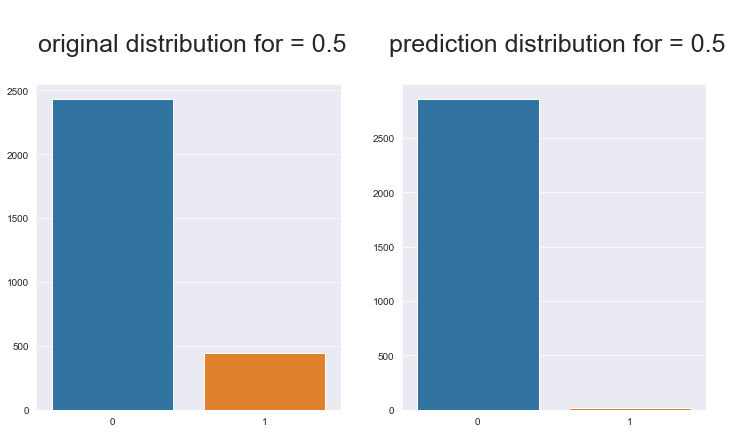

In [19]:
# let's schange threshhold

for i in range(2,6):
    pred = [0 if k<(i/10) else 1 for k in pred]
    print('\n\n classification_report for the threshold ' +str(i/10)+ ': \n\n',classification_report(y_test,pred))
    print('confusion_matrix for the threshold ' +str(i/10)+ ' is:\n\n',confusion_matrix(y_test,pred))
    
    #threshold visualization
    plt.figure(figsize = (12,6))
    
    plt.subplot(1,2,1)
    plt.title('\n original distribution for = '+str(i/10)+ '\n',fontsize=25)
    sns.countplot(y_test.reshape(2874,))
    plt.ylabel('')
    
    plt.subplot(1,2,2)
    plt.title('\n prediction distribution for = '+str(i/10)+ '\n',fontsize=25)
    sns.countplot(pred)
    plt.ylabel('')
    
    pred   = model.predict(X_test)


In [22]:
"""
After all what was plotted we realise now that
the real binary class threshold is between 0.3 and 0.4.
Let's repeat the process over that range
"""



 classification_report for the threshold 0.3: 

               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2431
           1       0.36      0.22      0.27       443

    accuracy                           0.82      2874
   macro avg       0.61      0.57      0.58      2874
weighted avg       0.79      0.82      0.80      2874

confusion_matrix for the threshold 0.3 is:

 [[2261  170]
 [ 347   96]]


 classification_report for the threshold 0.31: 

               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2431
           1       0.37      0.21      0.26       443

    accuracy                           0.82      2874
   macro avg       0.62      0.57      0.58      2874
weighted avg       0.79      0.82      0.80      2874

confusion_matrix for the threshold 0.31 is:

 [[2278  153]
 [ 352   91]]


 classification_report for the threshold 0.32: 

               precision    recall  f1-score   

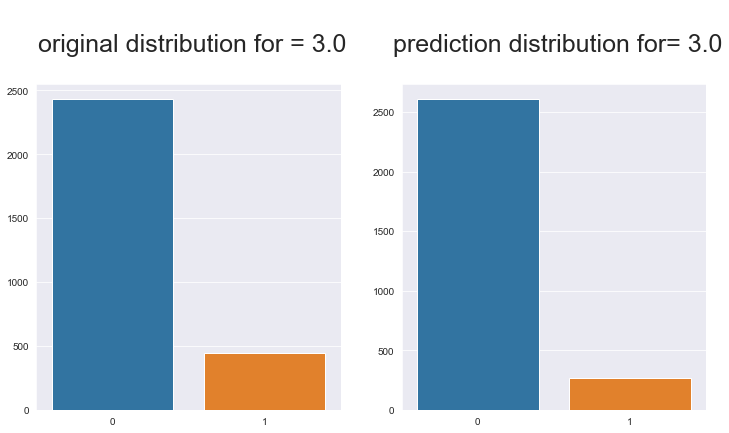

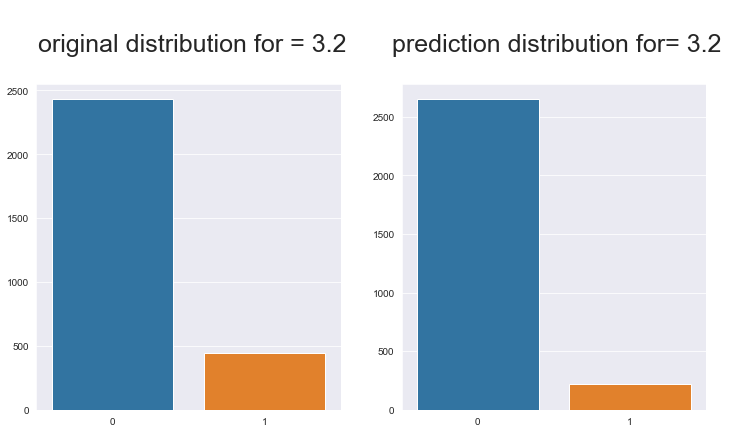

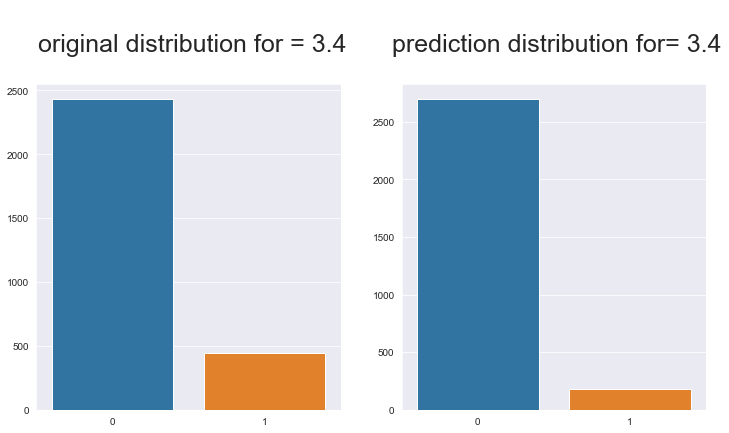

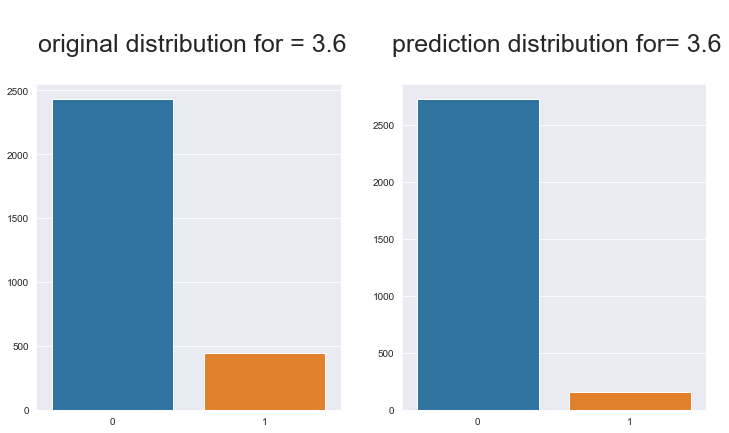

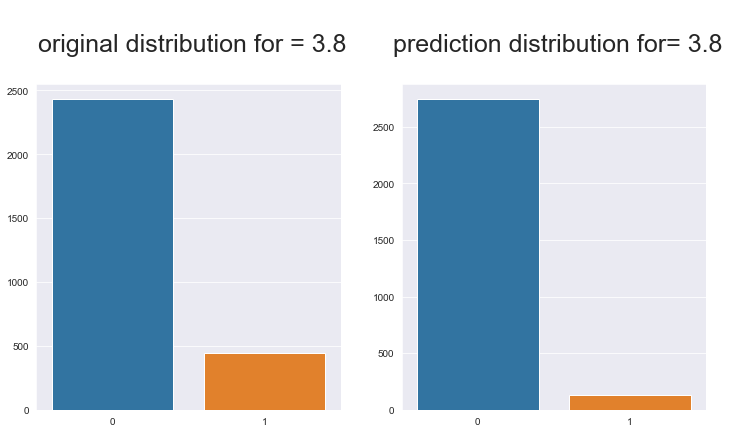

In [24]:
for i in range(30,40):
    pred = [0 if k<(i/100) else 1 for k in pred]
    print('\n\n classification_report for the threshold ' +str(i/100)+ ': \n\n',classification_report(y_test,pred))
    print('confusion_matrix for the threshold ' +str(i/100)+ ' is:\n\n',confusion_matrix(y_test,pred))
   
    #minimze visualization
    if i%2==0:
        
        plt.figure(figsize = (12,6))
        
        plt.subplot(1,2,1)
        plt.title('\n original distribution for = '+str(i/10)+ '\n',fontsize=25)
        sns.countplot(y_test.reshape(2874,))
        plt.ylabel('')
        
        plt.subplot(1,2,2)
        plt.title('\n prediction distribution for= '+str(i/10)+ '\n',fontsize=25)
        sns.countplot(pred)
        plt.ylabel('')
    
    #pred back to the original values
    pred   = model.predict(X_test)
    
    #next loop

In [ ]:
""" conclosion : the best threshold is 0.32:

    # Accuricy = 0.82
    # F-Score  = 0.79
    # Marco    = 0.56

"""   

In [25]:
"""
note codes: in case needed:
pred = np.float64(pred).round()
pred=pred.reshape(6484,1)
"""


#        Dropout nuerons model

model = Sequential()

model.add(Dense(14,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='rmsprop',loss='binary_crossentropy')
model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test),verbose =0,callbacks =[early])



 classification_report: 

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2431
           1       0.36      0.18      0.24       443

    accuracy                           0.82      2874
   macro avg       0.61      0.56      0.57      2874
weighted avg       0.79      0.82      0.80      2874

confusion_matrix is:

 [[2289  142]
 [ 362   81]] 




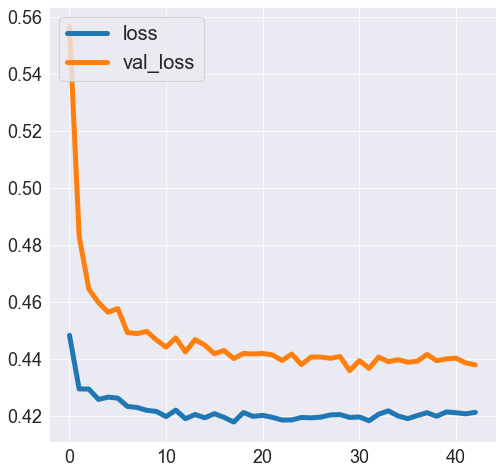

In [29]:
# visual evaluation

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
errorDropout = pd.DataFrame(loss,val_loss).reset_index()
errorDropout.columns = ['loss','val_loss']

errorDropout.plot(figsize=(8,8),lw=5,fontsize=18)
plt.legend(loc='upper left',prop={'size':20})

#inumerate evaluation
# remeber threshold now is 0.32
pred = [0 if i<0.32 else 1 for i in pred]

print('\n\n classification_report: \n\n',classification_report(y_test,pred))
print('confusion_matrix is:\n\n',confusion_matrix(y_test,pred),'\n\n')

Epoch 00043: early stopping


 classification_report: 

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2431
           1       0.36      0.18      0.24       443

    accuracy                           0.82      2874
   macro avg       0.61      0.56      0.57      2874
weighted avg       0.79      0.82      0.80      2874

confusion_matrix is:

 [[2289  142]
 [ 362   81]]


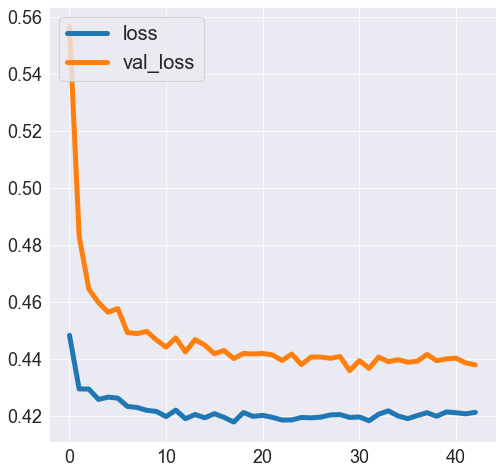

In [27]:
#stable amount of nurons model

model = Sequential()

model.add(Dense(7,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer='rmsprop',loss='binary_crossentropy')
model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test) ,verbose=0,callbacks =[early])


# visual evaluation

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
errorStableNuerons = pd.DataFrame(loss,val_loss).reset_index()
errorStableNuerons.columns = ['loss','val_loss']

errorStableNuerons.plot(figsize=(8,8),lw=5,fontsize=18)
plt.legend(loc='upper left',prop={'size':20})


#inumerate evaluation
# remeber threshold now is 0.32
pred = [0 if i<0.32 else 1 for i in pred]

print('\n\n classification_report: \n\n',classification_report(y_test,pred))
print('confusion_matrix is:\n\n',confusion_matrix(y_test,pred),'\n\n')

Epoch 00055: early stopping


 classification_report: 

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2431
           1       0.36      0.18      0.24       443

    accuracy                           0.82      2874
   macro avg       0.61      0.56      0.57      2874
weighted avg       0.79      0.82      0.80      2874

confusion_matrix is:

 [[2289  142]
 [ 362   81]] 




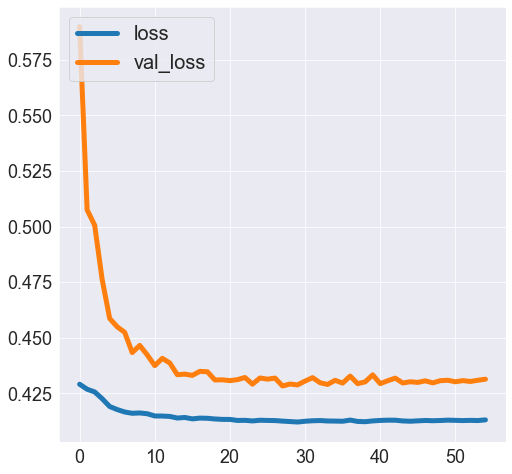

In [30]:
# different activation function(tanH)

model = Sequential()

model.add(Dense(14,activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(7,activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(3,activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy')
model.fit(X_train,y_train,epochs = 100,validation_data = (X_test,y_test), verbose=0, callbacks =[early])


#visual evaluation

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
errorHtan = pd.DataFrame(loss,val_loss).reset_index()
errorHtan.columns = ['loss','val_loss']

errorHtan.plot(figsize=(8,8),lw=5,fontsize=18)
plt.legend(loc='upper left',prop={'size':20})


#inumerate evaluation
pred = [0 if i<0.32 else 1 for i in pred]

print('\n\n classification_report: \n\n',classification_report(y_test,pred))
print('confusion_matrix is:\n\n',confusion_matrix(y_test,pred),'\n\n')

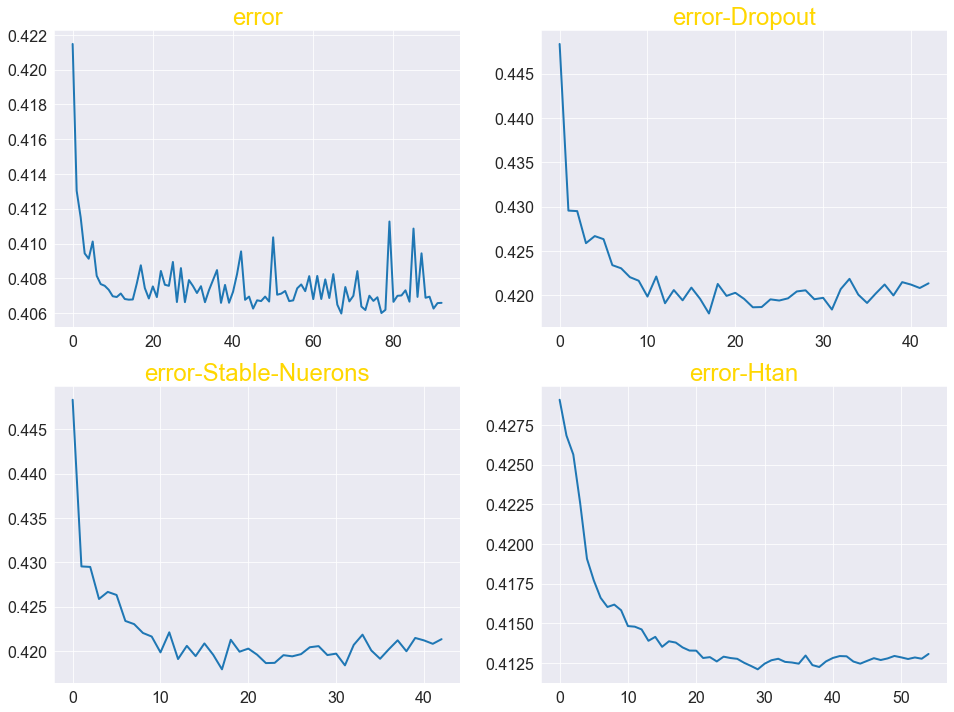

In [58]:
###         plots all graphs to the screen



# creating a list of all models

models     = [error, errorDropout, errorStableNuerons, errorHtan]
modelsStr = 'error error-Dropout error-Stable-Nuerons error-Htan'.split()


# for each model plot loss and val_loss on a diiferent subplot graph

plt.figure(figsize=(16,12))
for i, model in enumerate(models):
    plt.subplot(2,2,i+1)
    model['loss'].plot(lw=2,fontsize=16)
    plt.title((modelsStr[i]),fontsize=24,color='gold')

C:\Users\97250\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


Text(0.5, 1.0, '\n Losses of all methods  \n')

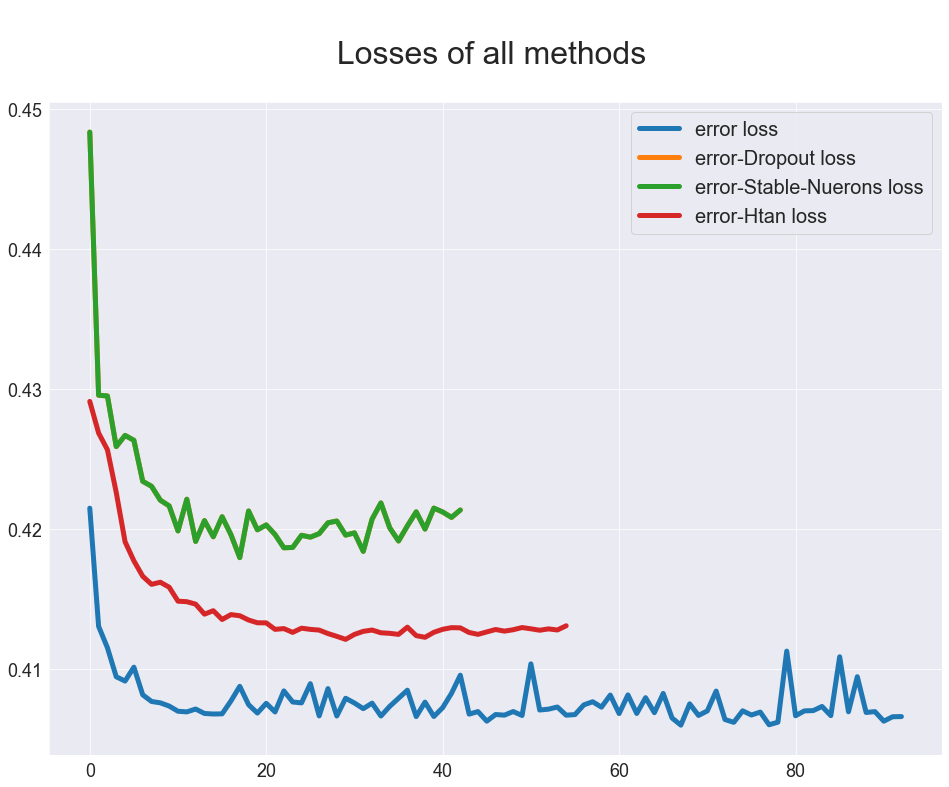

In [67]:
#plot all errors loss in one graph

plt.figure(figsize=(10,10))
for i,model in enumerate(models):
    model['loss'].plot(lw = 5,figsize=(16,12), fontsize=18, label= (modelsStr[i]+' loss'))
plt.legend(loc='left',prop={'size':20})
plt.title('\n Losses of all methods  \n',fontsize = 32)

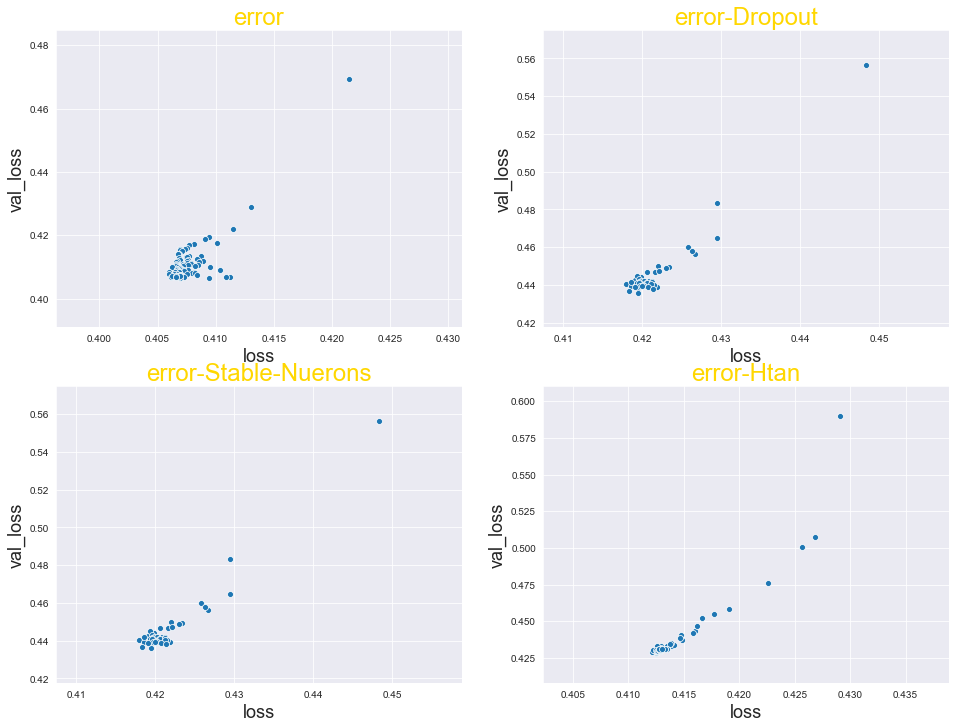

In [70]:
#scatter plots of loss and validation loss per each method
    
plt.figure(figsize=(16,12))
for i, model in enumerate(models):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x='loss',y='val_loss',data=model)
    plt.title((modelsStr[i]),fontsize=24,color='gold')
    plt.xlabel('loss',fontsize=18)
    plt.ylabel('val_loss',fontsize=18)  